In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,DBSCAN,AgglomerativeClustering
from sklearn.metrics import precision_score, recall_score, accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
import warnings
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.manifold import TSNE
warnings.filterwarnings("ignore")
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import anderson
from sklearn.model_selection import train_test_split
from scipy.stats import mannwhitneyu
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_curve,roc_auc_score

In [2]:
df = pd.read_excel('./DataSets/chrn.xlsx')
df.head()

,individual_id,address_id,curr_ann_amt,days_tenure,cust_orig_date,age_in_years,date_of_birth,latitude,longitude,city,...,income,has_children,length_of_residence,marital_status,home_market_value,home_owner,college_degree,good_credit,acct_suspd_date,Churn
0,221300017872,521300005982,818.877997,1454,2018-12-09,44,1978-06-23,32.578829,-96.305006,Kaufman,...,22500.0,1,15.0,Married,50000 - 74999,1,1,1,NaN,0
1,221300134410,521300051115,974.199182,1795,2018-01-02,72,1950-05-30,32.732209,-97.000893,Grand Prairie,...,27500.0,0,2.0,Single,50000 - 74999,1,0,0,NaN,0
2,221300673028,521300247929,967.375112,4818,2009-09-23,55,1967-07-07,32.819777,-96.846938,Dallas,...,42500.0,0,10.0,Married,75000 - 99999,1,0,0,NaN,0
3,221301573419,521300570147,992.409561,130,2022-07-25,53,1969-05-25,32.684065,-97.162180,Arlington,...,125000.0,1,6.0,Married,175000 - 199999,1,0,1,2021-12-22,1
4,221301622347,521300588399,784.633494,5896,2006-10-11,50,1972-09-25,32.751398,-97.376745,Fort Worth,...,87500.0,1,4.0,Married,225000 - 249999,1,1,1,NaN,0


In [69]:
print(df.shape)
print('\nThe number of observation in the data set are ',df.shape[0])
print('\nThe number of features or variables in the data set are ',df.shape[1])

(100000, 22)

The number of observation in the data set are  100000

The number of features or variables in the data set are  22


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   individual_id        100000 non-null  int64  
 1   address_id           100000 non-null  int64  
 2   curr_ann_amt         100000 non-null  float64
 3   days_tenure          100000 non-null  int64  
 4   cust_orig_date       100000 non-null  object 
 5   age_in_years         100000 non-null  int64  
 6   date_of_birth        100000 non-null  object 
 7   latitude             84734 non-null   float64
 8   longitude            84734 non-null   float64
 9   city                 99306 non-null   object 
 10  state                100000 non-null  object 
 11  county               99306 non-null   object 
 12  income               100000 non-null  float64
 13  has_children         100000 non-null  int64  
 14  length_of_residence  100000 non-null  float64
 15  marital_status    

In [71]:
df.nunique()

individual_id          100000
address_id              93901
curr_ann_amt            99994
days_tenure              4978
cust_orig_date           4978
age_in_years               92
date_of_birth            1001
latitude                78775
longitude               80314
city                       95
state                       1
county                     14
income                     20
has_children                2
length_of_residence        17
marital_status              2
home_market_value          19
home_owner                  2
college_degree              2
good_credit                 2
acct_suspd_date           300
Churn                       2
dtype: int64

There are categorical columns identified as numerical. So, we can consider the column having numerical datatype but less unique values as categorical columns

In [72]:
# Statistical summary of numerical columns
df.describe()

,individual_id,address_id,curr_ann_amt,days_tenure,age_in_years,latitude,longitude,income,has_children,length_of_residence,home_owner,college_degree,good_credit,Churn
count,1.000000e+05,1.000000e+05,100000.000000,100000.000000,100000.000000,84734.000000,84734.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,2.213018e+11,5.213007e+11,938.275323,3401.506320,55.240490,32.850811,-96.947701,81096.646463,0.527330,7.411644,0.816250,0.348940,0.841070,0.119200
std,9.920532e+05,4.170764e+05,245.896525,2310.125512,14.510631,0.194052,0.296583,53765.667329,0.499255,5.118246,0.387282,0.476637,0.365613,0.324025
min,2.213000e+11,5.213000e+11,-31.053997,20.000000,23.000000,32.021927,-98.004052,5000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.213009e+11,5.213003e+11,770.421723,1245.000000,45.000000,32.711895,-97.167877,47500.000000,0.000000,3.000000,1.000000,0.000000,1.000000,0.000000
50%,2.213018e+11,5.213007e+11,932.400983,3275.000000,55.000000,32.845990,-96.903859,70000.000000,1.000000,6.801000,1.000000,0.000000,1.000000,0.000000
75%,2.213027e+11,5.213010e+11,1100.435273,6215.000000,64.000000,32.983355,-96.720367,87500.000000,1.000000,12.000000,1.000000,1.000000,1.000000,0.000000
max,2.213033e+11,5.213015e+11,2269.374081,6291.000000,114.000000,33.531203,-96.070349,250000.000000,1.000000,15.000000,1.000000,1.000000,1.000000,1.000000


Inference:

1. On an average the current amount is 938 and Days tenure is 3401, which is close to 10 years.
2. The average income is around 81000
3. The Maximum current amount is around 2269 and Days tenure is 6291, which is close to 19 years.
4. The Maximum income is 250000.


In [73]:
# Statistical summary of categorical columns
df.describe(exclude=np.number)

,cust_orig_date,date_of_birth,city,state,county,marital_status,home_market_value,acct_suspd_date
count,100000,100000,99306,100000,99306,100000,94435,11920
unique,4978,1001,95,1,14,2,19,300
top,2005-09-11,1967-07-07,Dallas,TX,Dallas,Married,75000 - 99999,2022-09-17
freq,24592,8822,18167,100000,37153,61911,18330,59


# Data pre-processing

In [74]:
# Checking duplicate values
df[df.duplicated()].sum()

# no duplicate rows

individual_id          0.0
address_id             0.0
curr_ann_amt           0.0
days_tenure            0.0
cust_orig_date         0.0
age_in_years           0.0
date_of_birth          0.0
latitude               0.0
longitude              0.0
city                   0.0
state                  0.0
county                 0.0
income                 0.0
has_children           0.0
length_of_residence    0.0
marital_status         0.0
home_market_value      0.0
home_owner             0.0
college_degree         0.0
good_credit            0.0
acct_suspd_date        0.0
Churn                  0.0
dtype: float64

## 1. IDENTIFYING AND HANDLING ANOMALIES,MISSING VALUES PRESENT IN DATA

In [75]:
df.isnull().sum()/len(df)*100

individual_id           0.000
address_id              0.000
curr_ann_amt            0.000
days_tenure             0.000
cust_orig_date          0.000
age_in_years            0.000
date_of_birth           0.000
latitude               15.266
longitude              15.266
city                    0.694
state                   0.000
county                  0.694
income                  0.000
has_children            0.000
length_of_residence     0.000
marital_status          0.000
home_market_value       5.565
home_owner              0.000
college_degree          0.000
good_credit             0.000
acct_suspd_date        88.080
Churn                   0.000
dtype: float64

There are missing values in the latitude, longitude, city, county, home_market_value and acct_suspd_date variables.

In [76]:
df.columns

Index(['individual_id', 'address_id', 'curr_ann_amt', 'days_tenure',
       'cust_orig_date', 'age_in_years', 'date_of_birth', 'latitude',
       'longitude', 'city', 'state', 'county', 'income', 'has_children',
       'length_of_residence', 'marital_status', 'home_market_value',
       'home_owner', 'college_degree', 'good_credit', 'acct_suspd_date',
       'Churn'],
      dtype='object')

In [5]:
df1 = df.drop(['individual_id', 'address_id','cust_orig_date', 'date_of_birth', 'latitude', 'longitude','acct_suspd_date'],axis=1)
df1.head()

,curr_ann_amt,days_tenure,age_in_years,city,state,county,income,has_children,length_of_residence,marital_status,home_market_value,home_owner,college_degree,good_credit,Churn
0,818.877997,1454,44,Kaufman,TX,Kaufman,22500.0,1,15.0,Married,50000 - 74999,1,1,1,0
1,974.199182,1795,72,Grand Prairie,TX,Dallas,27500.0,0,2.0,Single,50000 - 74999,1,0,0,0
2,967.375112,4818,55,Dallas,TX,Dallas,42500.0,0,10.0,Married,75000 - 99999,1,0,0,0
3,992.409561,130,53,Arlington,TX,Tarrant,125000.0,1,6.0,Married,175000 - 199999,1,0,1,1
4,784.633494,5896,50,Fort Worth,TX,Tarrant,87500.0,1,4.0,Married,225000 - 249999,1,1,1,0


In [78]:
df1.isnull().sum()

curr_ann_amt              0
days_tenure               0
age_in_years              0
city                    694
state                     0
county                  694
income                    0
has_children              0
length_of_residence       0
marital_status            0
home_market_value      5565
home_owner                0
college_degree            0
good_credit               0
Churn                     0
dtype: int64

In [79]:
df1['city'].fillna(df1['city'].mode()[0],inplace=True)
df1['county'].fillna(df1['county'].mode()[0],inplace=True)
df1['home_market_value'].fillna(df1['home_market_value'].mode()[0],inplace=True)

In [80]:
df1.isnull().sum()

curr_ann_amt           0
days_tenure            0
age_in_years           0
city                   0
state                  0
county                 0
income                 0
has_children           0
length_of_residence    0
marital_status         0
home_market_value      0
home_owner             0
college_degree         0
good_credit            0
Churn                  0
dtype: int64

In [81]:
df1['home_owner'].value_counts()

1    81625
0    18375
Name: home_owner, dtype: int64

In [82]:
df1['college_degree'].value_counts()

0    65106
1    34894
Name: college_degree, dtype: int64

In [83]:
df1['good_credit'].value_counts()

1    84107
0    15893
Name: good_credit, dtype: int64

In [84]:
df1['Churn'] = df1['Churn'].astype('object')
df1['home_owner'] = df1['home_owner'].astype('object')
df1['college_degree'] = df1['college_degree'].astype('object')
df1['good_credit'] = df1['good_credit'].astype('object')
df1['has_children'] = df1['has_children'].astype('object')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   curr_ann_amt         100000 non-null  float64
 1   days_tenure          100000 non-null  int64  
 2   age_in_years         100000 non-null  int64  
 3   city                 100000 non-null  object 
 4   state                100000 non-null  object 
 5   county               100000 non-null  object 
 6   income               100000 non-null  float64
 7   has_children         100000 non-null  object 
 8   length_of_residence  100000 non-null  float64
 9   marital_status       100000 non-null  object 
 10  home_market_value    100000 non-null  object 
 11  home_owner           100000 non-null  object 
 12  college_degree       100000 non-null  object 
 13  good_credit          100000 non-null  object 
 14  Churn                100000 non-null  object 
dtypes: float64(3), int

In [85]:
df1.describe(exclude=np.number)

,city,state,county,has_children,marital_status,home_market_value,home_owner,college_degree,good_credit,Churn
count,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000
unique,95,1,14,2,2,19,2,2,2,2
top,Dallas,TX,Dallas,1,Married,75000 - 99999,1,0,1,0
freq,18861,100000,37847,52733,61911,23895,81625,65106,84107,88080


In [6]:
df_num = df1.select_dtypes(include=np.number)
df_num.head()

,curr_ann_amt,days_tenure,age_in_years,income,has_children,length_of_residence,home_owner,college_degree,good_credit,Churn
0,818.877997,1454,44,22500.0,1,15.0,1,1,1,0
1,974.199182,1795,72,27500.0,0,2.0,1,0,0,0
2,967.375112,4818,55,42500.0,0,10.0,1,0,0,0
3,992.409561,130,53,125000.0,1,6.0,1,0,1,1
4,784.633494,5896,50,87500.0,1,4.0,1,1,1,0


In [87]:
df_cat = df1.select_dtypes(exclude=np.number)
df_cat.head()

,city,state,county,has_children,marital_status,home_market_value,home_owner,college_degree,good_credit,Churn
0,Kaufman,TX,Kaufman,1,Married,50000 - 74999,1,1,1,0
1,Grand Prairie,TX,Dallas,0,Single,50000 - 74999,1,0,0,0
2,Dallas,TX,Dallas,0,Married,75000 - 99999,1,0,0,0
3,Arlington,TX,Tarrant,1,Married,175000 - 199999,1,0,1,1
4,Fort Worth,TX,Tarrant,1,Married,225000 - 249999,1,1,1,0


In [88]:
for i in df_cat.columns:
    print('variable name',i,'number of unique classes are',df_cat[i].nunique())
    print('==================================================')

variable name city number of unique classes are 95
variable name state number of unique classes are 1
variable name county number of unique classes are 14
variable name has_children number of unique classes are 2
variable name marital_status number of unique classes are 2
variable name home_market_value number of unique classes are 19
variable name home_owner number of unique classes are 2
variable name college_degree number of unique classes are 2
variable name good_credit number of unique classes are 2
variable name Churn number of unique classes are 2


<AxesSubplot:ylabel='Density'>

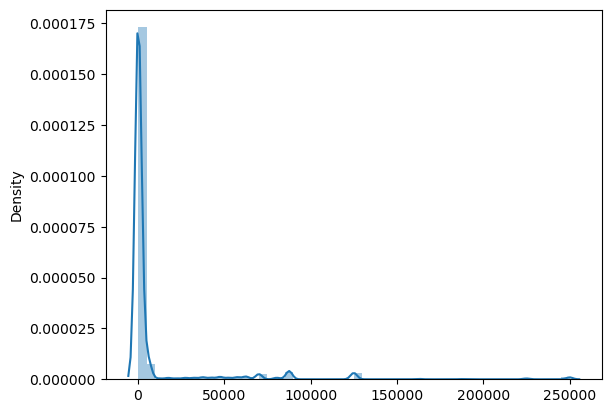

In [8]:
sns.distplot(df_num)

In [7]:
df_num.skew()

curr_ann_amt           0.130938
days_tenure           -0.024468
age_in_years           0.550984
income                 1.569307
has_children          -0.109485
length_of_residence    0.260544
home_owner            -1.633209
college_degree         0.633870
good_credit           -1.865783
Churn                  2.350481
dtype: float64

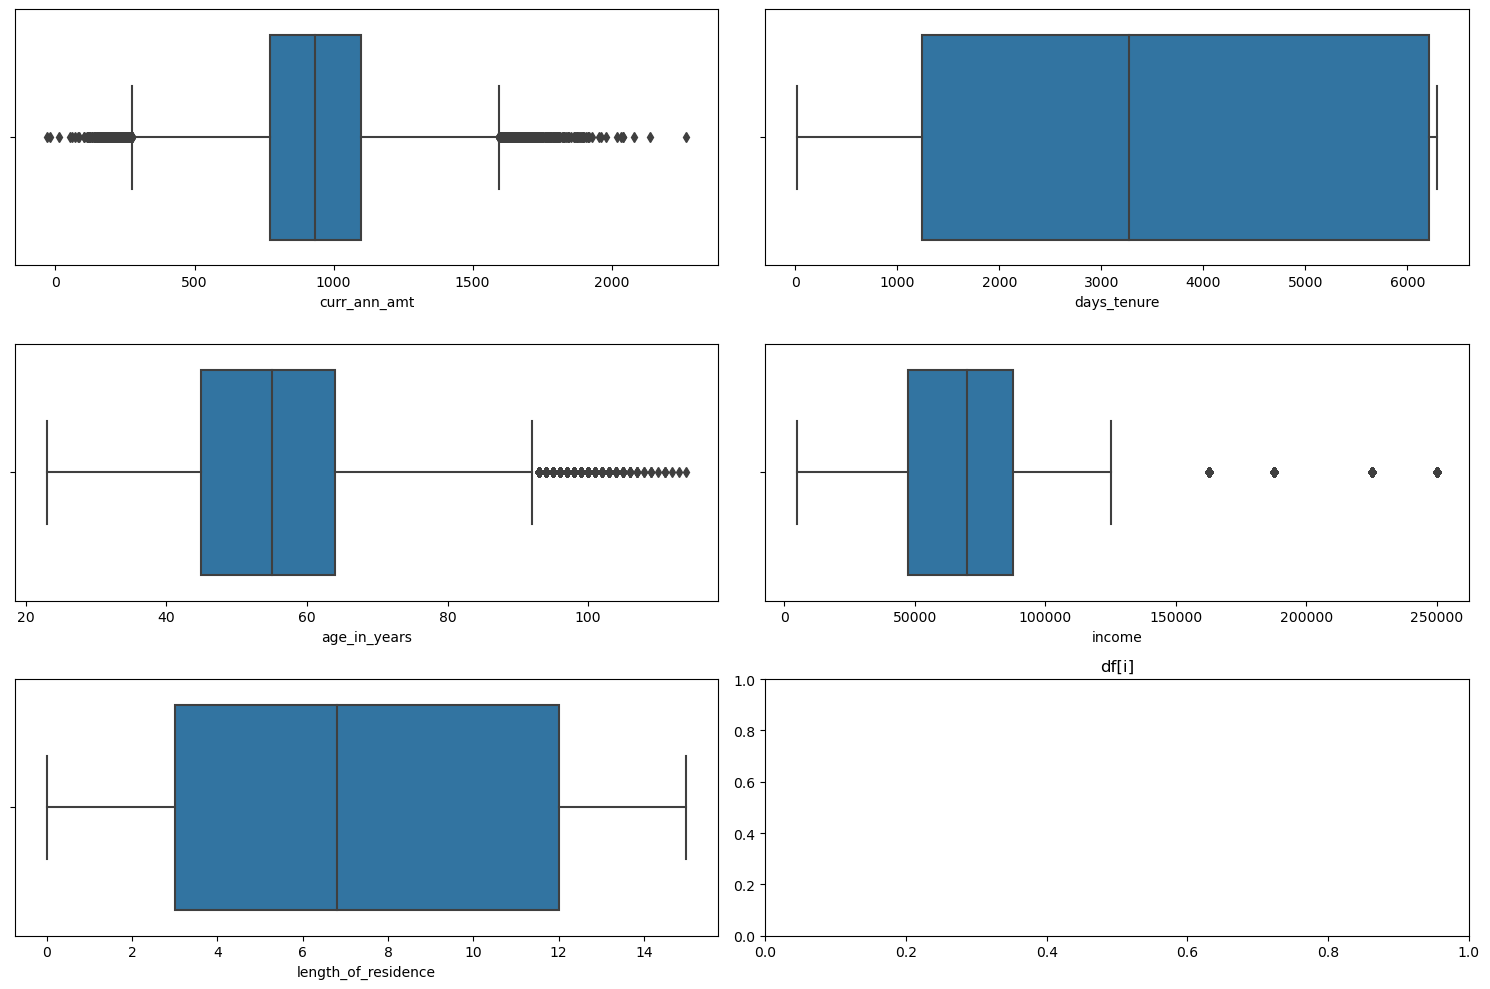

In [90]:
#fig, ax = plt.subplots(nrows=1, ncols=len(df), figsize=(10, 5))

fig,ax= plt.subplots(3,2,figsize=(15,10))

for i,subplots in zip(df_num,ax.flatten()):
    sns.boxplot(x=df[i], ax=subplots)
    plt.title('df[i]')
plt.tight_layout()

In [91]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

threshold = 1.5
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR


df_outlier = df[((df < lower_bound) | (df > upper_bound)).any(axis=1)]
df_outlier.shape

(45362, 22)

In [92]:
df_num.kurt()

curr_ann_amt           0.057041
days_tenure           -1.511479
age_in_years           0.110744
income                 2.714688
length_of_residence   -1.308739
dtype: float64

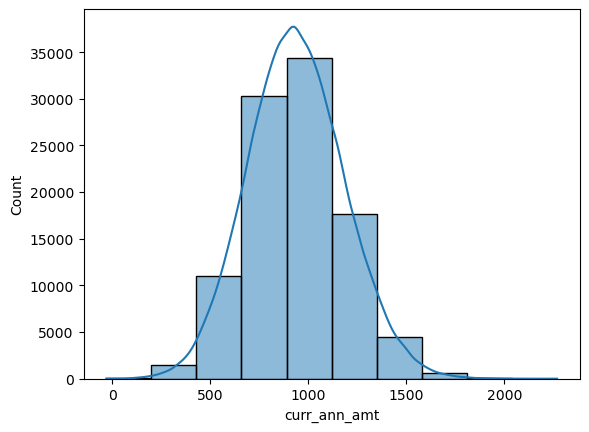

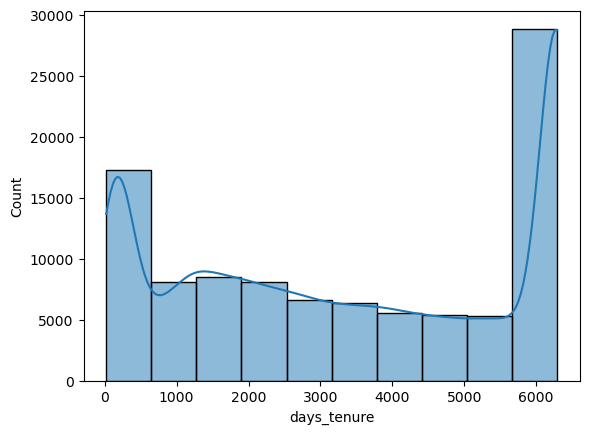

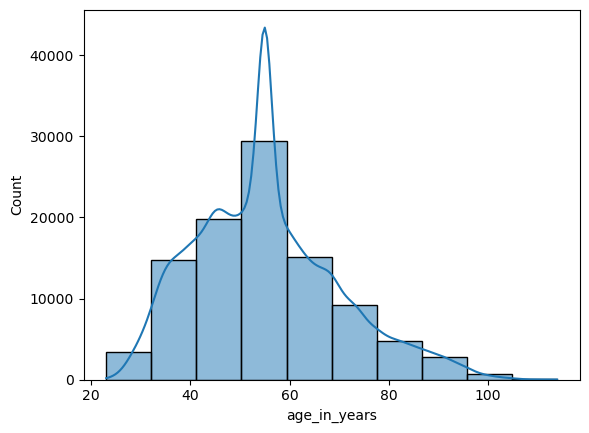

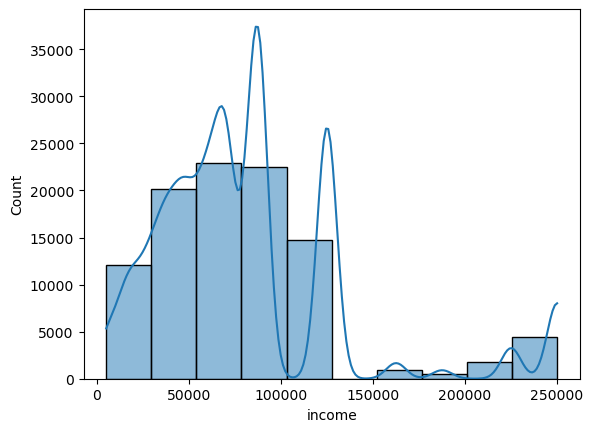

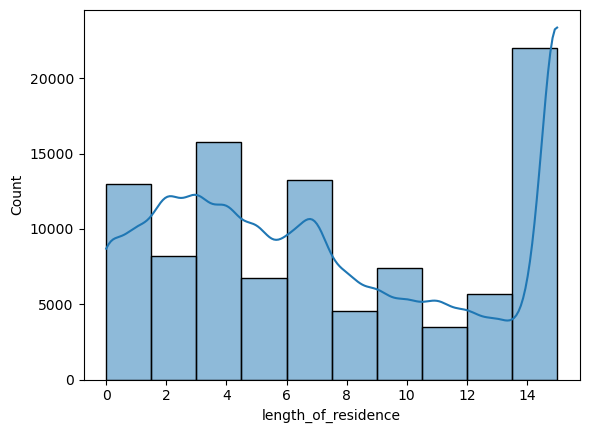

In [93]:
for i in df_num.columns:
    sns.histplot(df_num[i],bins=10,kde=True)
    plt.show()

Inferences:
1. From the above numerical features we can clearly see that there are outliers present in the data.
2. The features have the right tail or positive skewed and left tail or negative skewed.
3. From the plot we can also see the platy peakedness in the data which makes the data plato kurtic with the value less than 3.

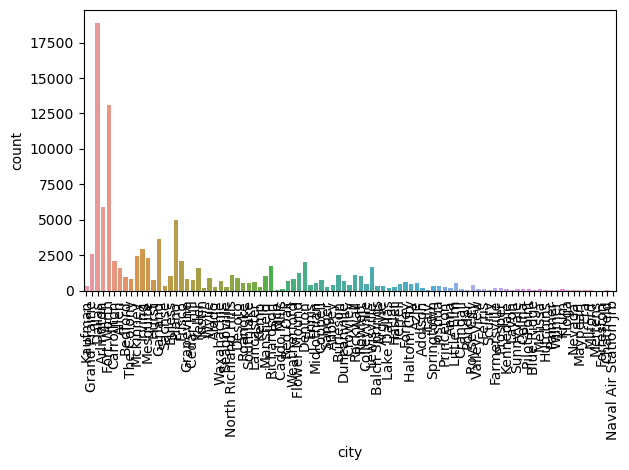

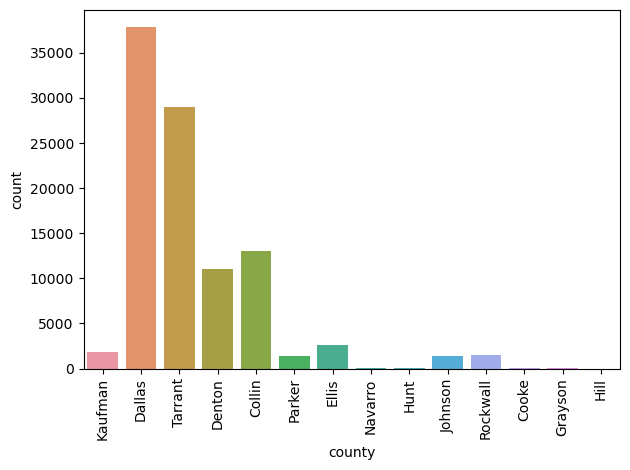

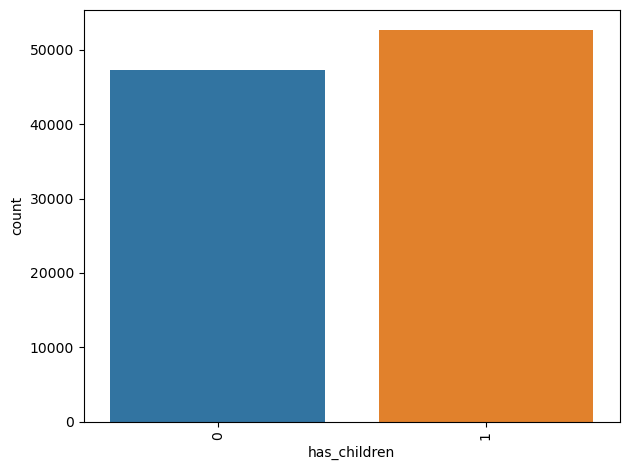

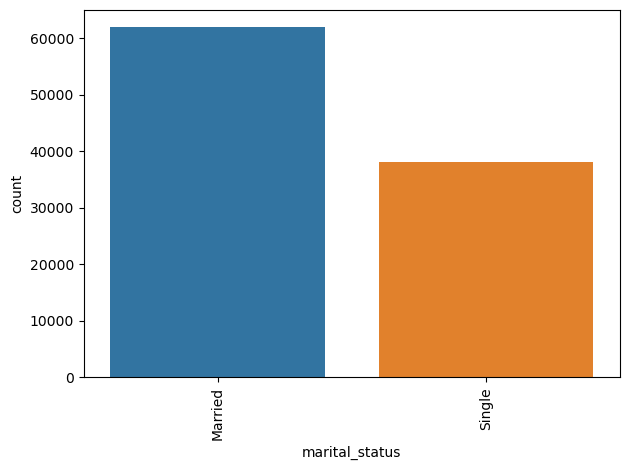

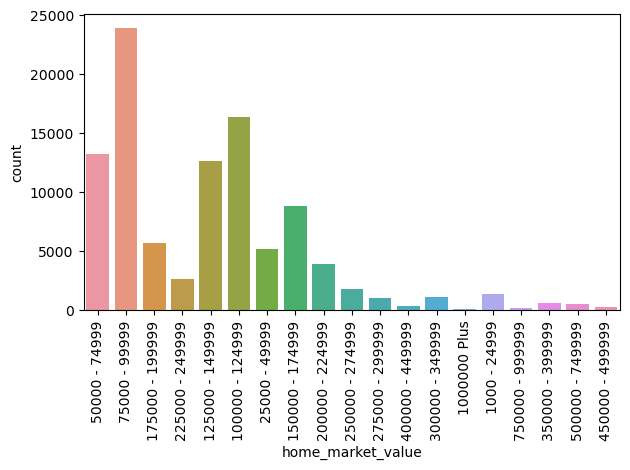

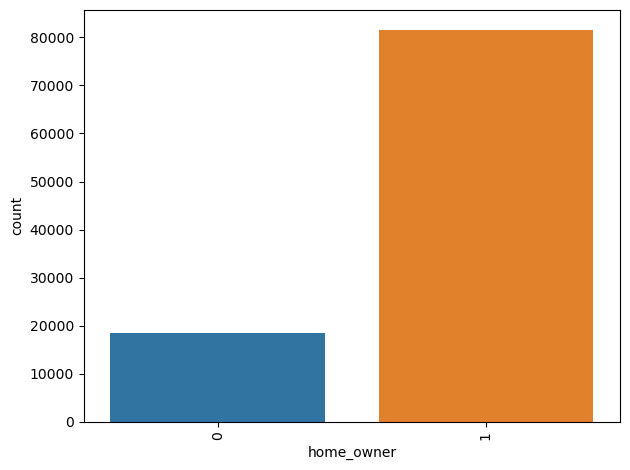

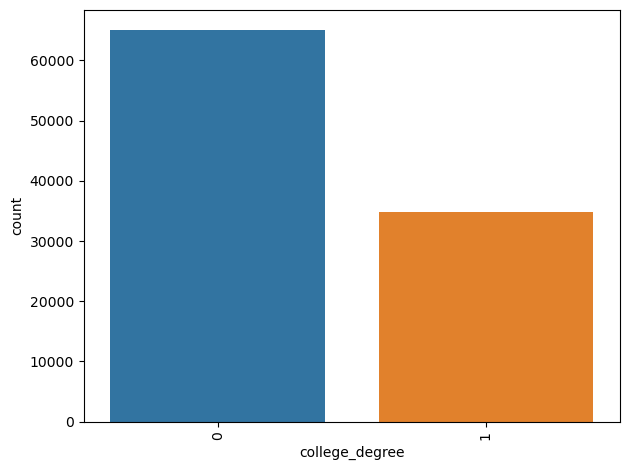

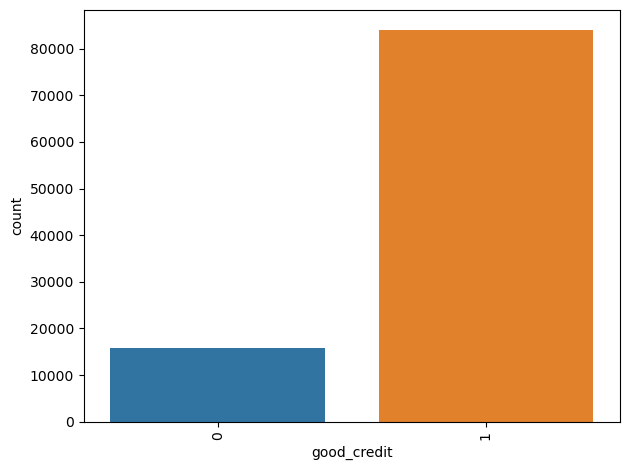

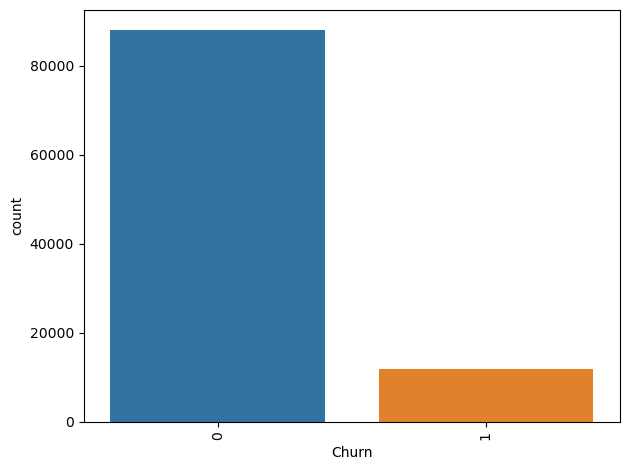

In [94]:
for i in df_cat.drop('state',axis=1).columns:
    sns.countplot(df_cat[i])
    plt.xticks(rotation=90)  # Rotate city names for better visibility
    plt.tight_layout()  # Adjust layout to prevent labels from being cut off
    plt.show()

Inference:

1) We have more number of records from Dallas county, followed by very less number of records from Hill county
2) Huge number of married people records are found and less number of records are from the unmarried people.
3) We have records more number of records whose home market value is between 75,000 - 100,000
4) A very less number of people found with home market value is 1,000,000 1M.


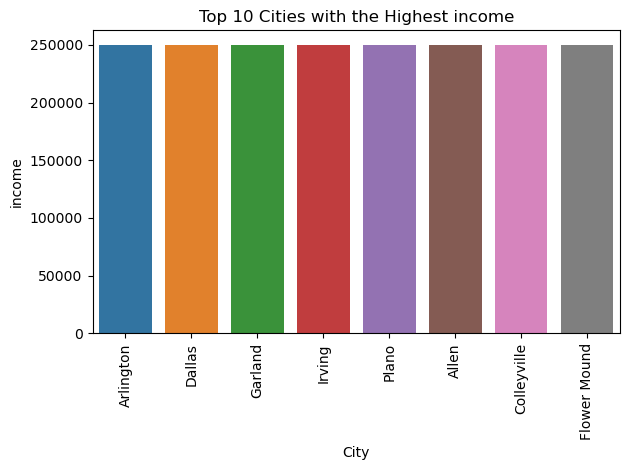

In [95]:
# Sort the cities based on sales in descending order
sorted_cities = sorted(zip(df1['city'],df1['income']), key=lambda x: x[1], reverse=True)

# Select the top 10 cities
top_10_cities = sorted_cities[:10]
top_10_city_names = [city[0] for city in top_10_cities]
top_10_income = [city[1] for city in top_10_cities]

# Plotting the top 10 cities
sns.barplot(top_10_city_names, top_10_income)
plt.xlabel("City")
plt.ylabel("income")
plt.title("Top 10 Cities with the Highest income")
plt.xticks(rotation=90)  # Rotate city names for better visibility
plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.show()

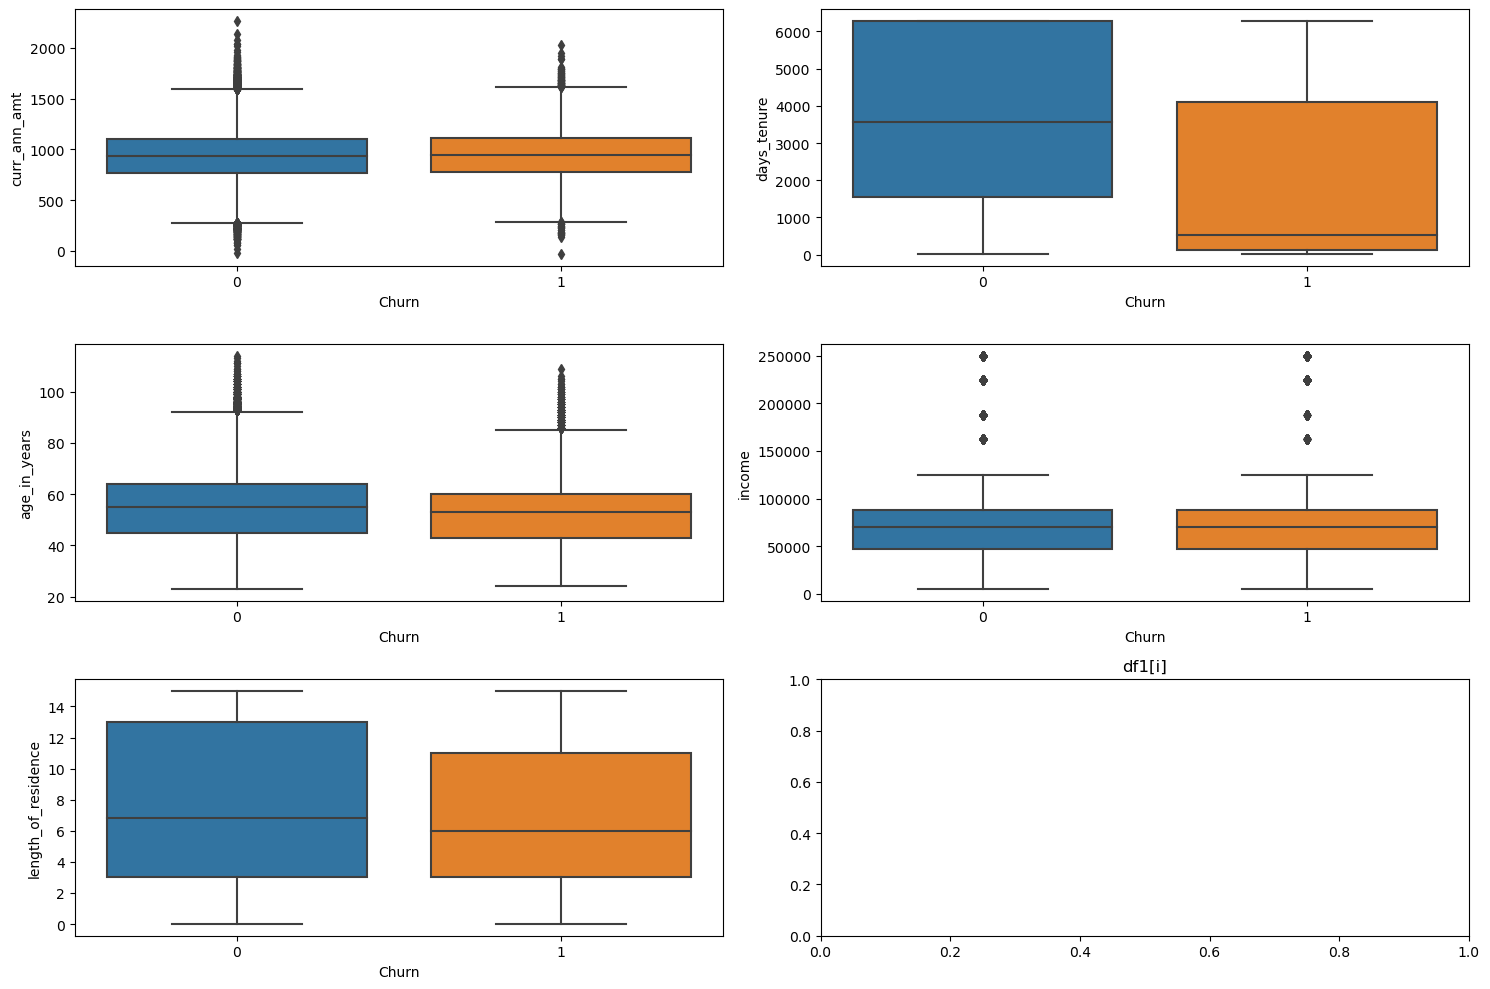

In [96]:
fig,ax= plt.subplots(3,2,figsize=(15,10))

for i,subplots in zip(df_num,ax.flatten()):
    sns.boxplot(x=df1['Churn'],y=df1[i], ax=subplots)
    plt.title('df1[i]')
plt.tight_layout()

In [97]:
for i,subplots in zip(df_cat,ax.flatten()):
    print(pd.crosstab(df1[i],df1['Churn']).T)
    print('==================================')

city   Addison  Aledo  Allen  Anna  Argyle  Arlington  Aubrey  Azle  \
Churn                                                                 
0          176    218   1441   166     284       5154     358   470   
1           26     32    186    24      42        714      50    81   

city   Balch Springs  Bedford  ...  Springtown  Sunnyvale  Terrell  \
Churn                          ...                                   
0                278      836  ...         285         76      437   
1                 44      129  ...          41         11       60   

city   The Colony  Tioga  Valley View  Waxahachie  Weatherford  Wilmer  Wylie  
Churn                                                                          
0             730     23           76         612          751      52    776  
1              99      2           12          91          102       4    100  

[2 rows x 95 columns]
state     TX
Churn       
0      88080
1      11920
county  Collin  Cooke  Dallas  Denton  

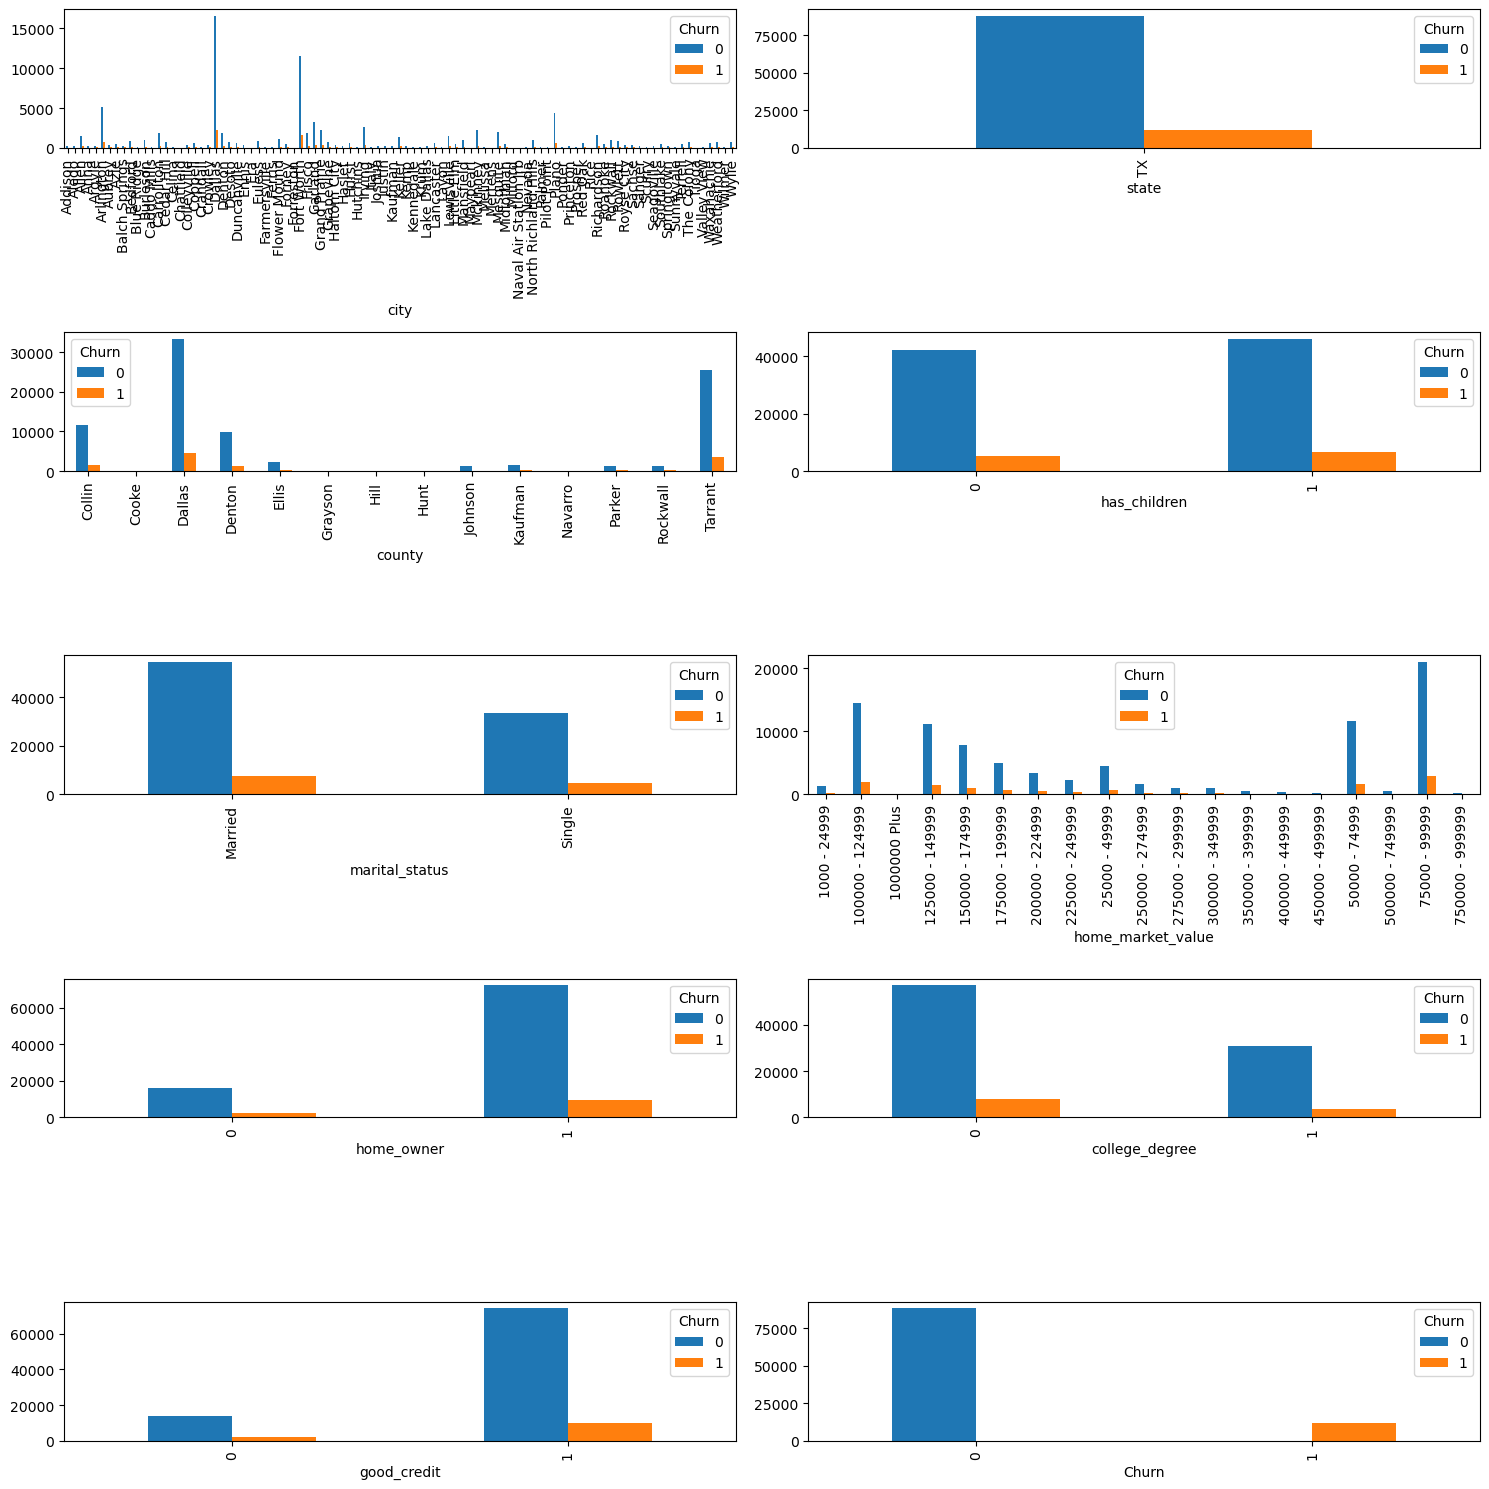

In [98]:
fig,ax= plt.subplots(5,2,figsize=(15,15))
for i,subplots in zip(df_cat,ax.flatten()):
    pd.crosstab(df1[i],df1['Churn']).plot(kind='bar',ax=subplots)
    plt.xticks(rotation=90)  # Rotate city names for better visibility
    plt.tight_layout()  # Adjust layout to prevent labels from being cut off

In [99]:
df1.std()

curr_ann_amt             245.896525
days_tenure             2310.125512
age_in_years              14.510631
income                 53765.667329
has_children               0.499255
length_of_residence        5.118246
home_owner                 0.387282
college_degree             0.476637
good_credit                0.365613
Churn                      0.324025
dtype: float64

In [100]:
df1.corr()

,curr_ann_amt,days_tenure,age_in_years,income,length_of_residence
curr_ann_amt,1.000000,0.009788,0.081610,0.137411,0.188044
days_tenure,0.009788,1.000000,0.276039,0.019437,0.091148
age_in_years,0.081610,0.276039,1.000000,-0.007284,0.283228
income,0.137411,0.019437,-0.007284,1.000000,0.056421
length_of_residence,0.188044,0.091148,0.283228,0.056421,1.000000


<AxesSubplot:>

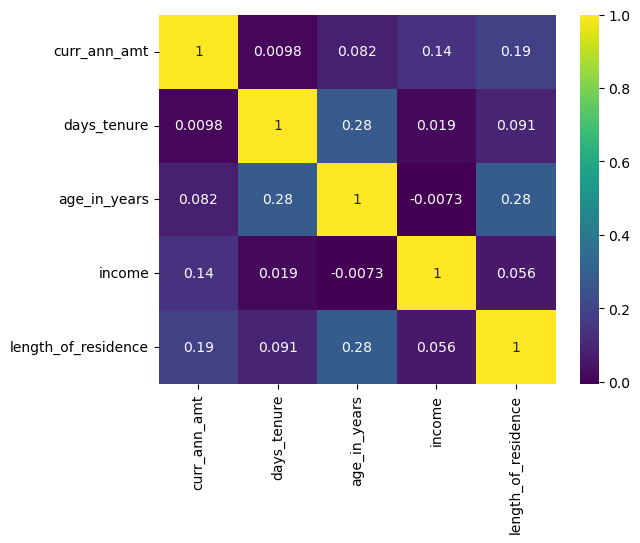

In [101]:
sns.heatmap(df1.corr(),annot=True,cmap='viridis')

In [102]:
df['Churn'].value_counts(normalize=True)*100
# data is hugely imbalanced
# so we can use smote analysis

0    88.08
1    11.92
Name: Churn, dtype: float64

In [103]:
df_cat.head()

,city,state,county,has_children,marital_status,home_market_value,home_owner,college_degree,good_credit,Churn
0,Kaufman,TX,Kaufman,1,Married,50000 - 74999,1,1,1,0
1,Grand Prairie,TX,Dallas,0,Single,50000 - 74999,1,0,0,0
2,Dallas,TX,Dallas,0,Married,75000 - 99999,1,0,0,0
3,Arlington,TX,Tarrant,1,Married,175000 - 199999,1,0,1,1
4,Fort Worth,TX,Tarrant,1,Married,225000 - 249999,1,1,1,0


In [104]:
df_cat.columns

Index(['city', 'state', 'county', 'has_children', 'marital_status',
       'home_market_value', 'home_owner', 'college_degree', 'good_credit',
       'Churn'],
      dtype='object')

In [105]:
df_num.head()

,curr_ann_amt,days_tenure,age_in_years,income,length_of_residence
0,818.877997,1454,44,22500.0,15.0
1,974.199182,1795,72,27500.0,2.0
2,967.375112,4818,55,42500.0,10.0
3,992.409561,130,53,125000.0,6.0
4,784.633494,5896,50,87500.0,4.0


In [106]:
from sklearn.preprocessing import LabelEncoder,StandardScaler,PowerTransformer

In [107]:
le = LabelEncoder()

In [108]:
for col in df_cat.columns:
    df_cat[col] = le.fit_transform(df_cat[col])
df_cat.head()

,city,state,county,has_children,marital_status,home_market_value,home_owner,college_degree,good_credit,Churn
0,46,0,9,1,0,15,1,1,1,0
1,36,0,2,0,1,15,1,0,0,0
2,21,0,2,0,0,17,1,0,0,0
3,5,0,13,1,0,5,1,0,1,1
4,33,0,13,1,0,7,1,1,1,0


In [109]:
final_df = pd.concat([df_num,df_cat],axis=1)
final_df.head()

,curr_ann_amt,days_tenure,age_in_years,income,length_of_residence,city,state,county,has_children,marital_status,home_market_value,home_owner,college_degree,good_credit,Churn
0,818.877997,1454,44,22500.0,15.0,46,0,9,1,0,15,1,1,1,0
1,974.199182,1795,72,27500.0,2.0,36,0,2,0,1,15,1,0,0,0
2,967.375112,4818,55,42500.0,10.0,21,0,2,0,0,17,1,0,0,0
3,992.409561,130,53,125000.0,6.0,5,0,13,1,0,5,1,0,1,1
4,784.633494,5896,50,87500.0,4.0,33,0,13,1,0,7,1,1,1,0


In [110]:
x = final_df.drop('Churn',axis=1)
y = final_df['Churn']

xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.7,random_state=120)
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((70000, 14), (30000, 14), (70000,), (30000,))

In [111]:
df_num.columns

Index(['curr_ann_amt', 'days_tenure', 'age_in_years', 'income',
       'length_of_residence'],
      dtype='object')

In [112]:
xtrain_num=xtrain[['curr_ann_amt', 'days_tenure', 'age_in_years', 'income','length_of_residence']]
xtest_num=xtest[['curr_ann_amt', 'days_tenure', 'age_in_years', 'income','length_of_residence']]
xtrain_num.shape,xtest_num.shape

((70000, 5), (30000, 5))

In [113]:
xtrain_cat=xtrain.drop(['curr_ann_amt', 'days_tenure', 'age_in_years', 'income','length_of_residence'],axis=1)
xtest_cat=xtest.drop(['curr_ann_amt', 'days_tenure', 'age_in_years', 'income','length_of_residence'],axis=1)
xtrain_cat.shape,xtest_cat.shape

((70000, 9), (30000, 9))

In [114]:
ss = StandardScaler()

In [115]:
scaled_xtrain_num = pd.DataFrame(ss.fit_transform(xtrain_num),columns=xtrain_num.columns)
scaled_xtest_num = pd.DataFrame(ss.transform(xtest_num),columns=xtest_num.columns)
scaled_xtrain_num.head(2)

,curr_ann_amt,days_tenure,age_in_years,income,length_of_residence
0,-2.282548,-0.291191,-0.842213,-0.997212,-1.444738
1,0.075869,-1.126950,-0.012921,-0.344365,-1.053952


In [116]:
scaled_xtest_num.head(2)

,curr_ann_amt,days_tenure,age_in_years,income,length_of_residence
0,-1.853412,-1.437548,-0.980428,-0.204470,-0.858558
1,-1.430640,-0.369922,-0.634890,-1.090476,0.509195


In [117]:
xtrain_cat = xtrain_cat.reset_index()
xtest_cat = xtest_cat.reset_index()

In [118]:
xtrain_final = pd.concat([scaled_xtrain_num,xtrain_cat],axis=1)
xtest_final = pd.concat([scaled_xtest_num,xtest_cat],axis=1)
xtrain.shape

(70000, 14)

In [119]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [120]:
knn = KNeighborsClassifier()
knn.fit(xtrain_final,ytrain)
ypred_train_knn = knn.predict(xtrain_final)
ypred_knn = knn.predict(xtest_final)
print('the accuracy of training data is',accuracy_score(ytrain,ypred_train_knn))
print('the accuracy of testing data is',accuracy_score(ytest,ypred_knn))

the accuracy of training data is 0.8834
the accuracy of testing data is 0.8730666666666667


In [121]:
print(classification_report(ytrain,ypred_train_knn))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     61578
           1       0.62      0.08      0.14      8422

    accuracy                           0.88     70000
   macro avg       0.75      0.54      0.54     70000
weighted avg       0.86      0.88      0.84     70000



In [122]:
print(classification_report(ytest,ypred_knn))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93     26502
           1       0.13      0.02      0.03      3498

    accuracy                           0.87     30000
   macro avg       0.51      0.50      0.48     30000
weighted avg       0.80      0.87      0.83     30000



In [123]:
nb_base = GaussianNB()
nb_base.fit(xtrain_final,ytrain)
ypred_train_nb = nb_base.predict(xtrain_final)
ypred_nb = nb_base.predict(xtest_final)

In [124]:
print('the accuracy of training data is',accuracy_score(ytrain,ypred_train_nb))
print('the accuracy of testing data is',accuracy_score(ytest,ypred_nb))

the accuracy of training data is 0.8796857142857143
the accuracy of testing data is 0.8834


In [125]:
print(classification_report(ytrain,ypred_train_nb))
print('===============================================')
print(classification_report(ytest,ypred_nb))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     61578
           1       0.00      0.00      0.00      8422

    accuracy                           0.88     70000
   macro avg       0.44      0.50      0.47     70000
weighted avg       0.77      0.88      0.82     70000

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     26502
           1       0.00      0.00      0.00      3498

    accuracy                           0.88     30000
   macro avg       0.44      0.50      0.47     30000
weighted avg       0.78      0.88      0.83     30000



-> We got the overall train accuracy as 88%, but the f1-score is still poor, because of the class imbalance in the target variable.

-> We got a quite similar performance in both training and testing